<a href="https://colab.research.google.com/github/dh2chen/Double-Pendulum-Simulation-Project/blob/main/Double_Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

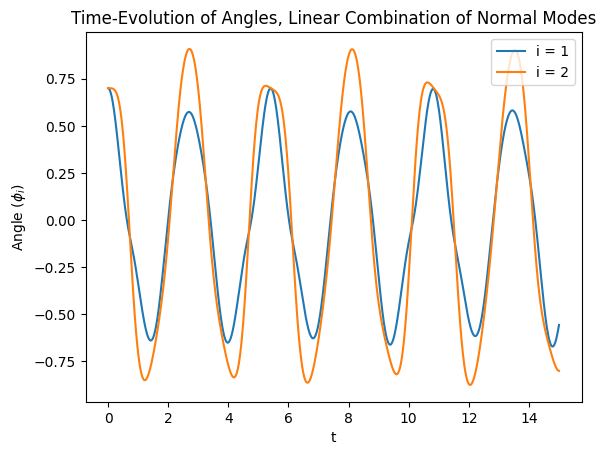

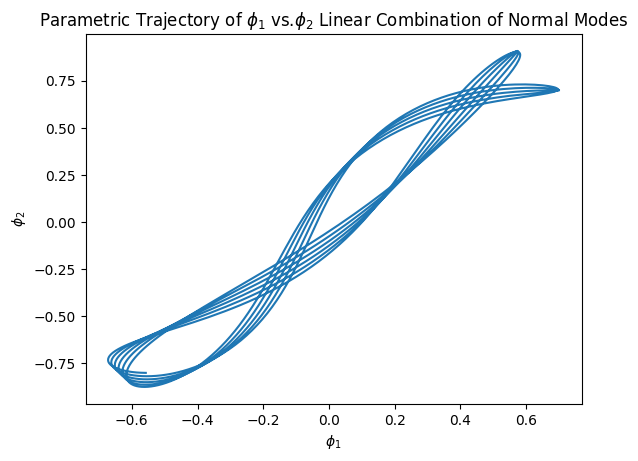

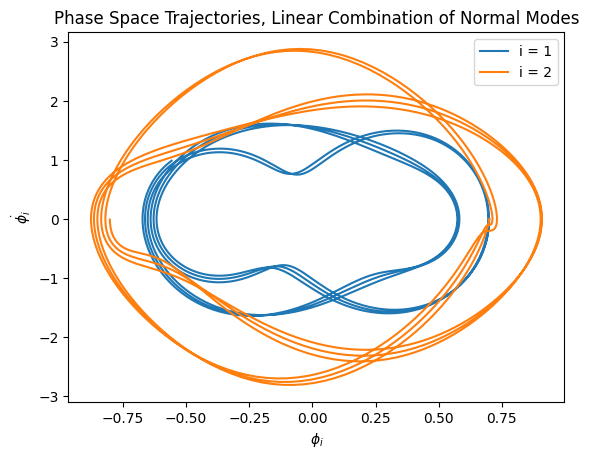

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def equations_of_motion(x, t):
  # constants:
  g = 9.81
  l = 1
  w = g/l

  #functions:
  phi_1 = x[0]
  phi_2 = x[1]
  phi_1_dot = x[2]
  phi_2_dot = x[3]

  # Matrix Stuff:
  M = np.array([[2, np.cos(phi_1-phi_2)],[np.cos(phi_1-phi_2), 1]])
  M_inverse = np.linalg.inv(M)
  f = np.array([-2*w*np.sin(phi_1)-phi_2_dot**2*np.sin(phi_1-phi_2), -w*np.sin(phi_2)+phi_1_dot**2*np.sin(phi_1-phi_2)])
  phi_ddot_vec = np.matmul(M_inverse, f)

  #DEs:
  d_phi_1_dt = phi_1_dot
  d_phi_2_dt = phi_2_dot
  d_phi_1_dot_dt = phi_ddot_vec[0]
  d_phi_2_dot_dt = phi_ddot_vec[1]

  return [d_phi_1_dt, d_phi_2_dt, d_phi_1_dot_dt, d_phi_2_dot_dt]

# initial_conditions:

#1st Normal Mode:
#x0 = [0.1, 0.141, 0, 0]

#2nd Normal Mode:
#x0 = [0.1, -0.141, 0, 0]

#Large Angle 1st Mode:
#x0 = [1, 1.41, 0, 0]

#Large Angle 2nd Mode:
#x0 = [1, -1.41, 0, 0]

#Combination of Modes:
#x0 = [0, 0.2, 0, 0]

#General Large Angle:
x0 = [0.7, 0.7, 0, 0]

#time
t = np.linspace(0, 15, 1000)
x = odeint(equations_of_motion, x0, t)

#Solutions:
phi_1 = x[:, 0]
phi_2 = x[:, 1]
phi_1_dot = x[:, 2]
phi_2_dot = x[:, 3]

descriptor = 'Linear Combination of Normal Modes'

plt.title('Time-Evolution of Angles, '+ descriptor )
plt.xlabel('t')
plt.ylabel('Angle ' + r'($\phi_i$)')
plt.plot(t,phi_1, label ='i = 1')
plt.plot(t, phi_2, label = 'i = 2')
plt.legend(loc = 'upper right')
plt.show()


plt.title('Parametric Trajectory of '+ r'$\phi_1$'+ ' vs.' + r'$\phi_2$' +' ' + descriptor)
plt.xlabel(r'$\phi_1$')
plt.ylabel(r'$\phi_2$')
plt.plot(phi_1, phi_2)
plt.show()

plt.title('Phase Space Trajectories, ' + descriptor)
plt.xlabel(r'$\phi_i$')
plt.ylabel(r'$\dot{\phi_i}$')
plt.plot(phi_1, phi_1_dot, label = 'i = 1')
plt.plot(phi_2, phi_2_dot, label = 'i = 2')
plt.legend(loc = 'upper right')
plt.show()

